In [2]:
# 3.1.


from numpy import array
from numpy.linalg import solve, inv, cholesky, norm
from scipy.linalg import lu, solve_triangular
from typing import Tuple, Callable
from time import time


def solve1(A: array, f: array) -> array:
    return solve(A, f)


def solve2(A: array, f: array) -> array:
    return inv(A) @ f


def solve3(A: array, f: array) -> array:
    P, L, U = lu(A)
    f_perm = P @ f
    l = solve_triangular(L, f_perm, lower=True)
    u = solve_triangular(U, l)
    
    return u


def solve4(A: array, f: array) -> array:
    L = cholesky(A)
    l = solve_triangular(L, f, lower=True)
    l_herm = solve_triangular(L.conj().T, l)
    
    return l_herm


def measure_runtime(solve: Callable[[array, array], array],
                    A: array, f: array) -> Tuple[array, float]:
    start = time()
    x = solve(A, f)
    finish = time()
    
    return x, finish - start


def err_norm(x: array, y: array) -> float:
    return norm(x - y) / norm(x)


def res_norm(f: array, Ax: array) -> float:
    return norm(f - Ax) / norm(f)


def matrix_norm(A: array) -> float:
    return norm(A, 2) * norm(inv(A), 2)


def return_stats(solve: Callable[[array, array], array],
                 A: array, y: array) -> Tuple[float, float, float]:
    f = A @ y
    x, runtime = measure_runtime(solve, A, f)
    
    return runtime, err_norm(x, y), res_norm(f, A @ x)


def print_stats(name: str, solve: Callable[[array, array], array],
                A: array, y: array) -> None:
    print(name)
    print("Runtime: {:.3}\n"
          "Error norm: {:.3}\n"
          "Residuum norm: {:.3}\n".format(*return_stats(solve, A, y)))


def compare_solvers(A: array, y: array) -> None:
    if A.shape[0] <= 100 and A.shape[1] <= 100:
        print("Matrix A norm: {:.5}\n\n".format(matrix_norm(A)))
    print_stats('solve', solve1, A, y)
    print_stats('inv', solve2, A, y)
    print_stats('lu', solve3, A, y)
    print_stats('cholesky', solve4, A, y)


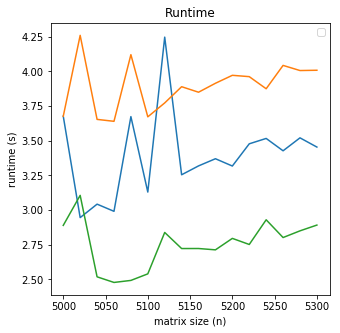

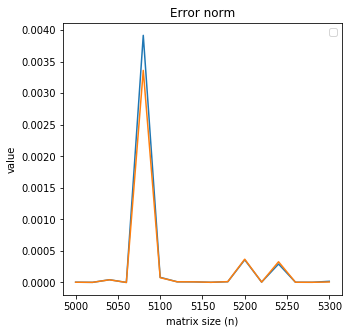

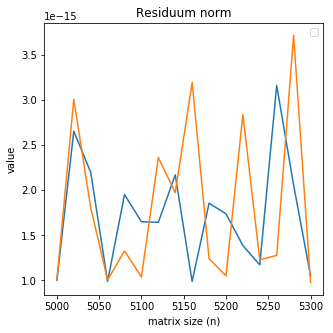

In [5]:
# 3.2.


%matplotlib inline

from numpy.random import rand
from typing import List
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show


def gen_input(n: int) -> Tuple[array, array]:
    A = rand(n, n)
    f = rand(n)
    
    return A @ A.T, f


def run_solvers(n: int) -> None:
    A, f = gen_input(n)
    compare_solvers(A, f)


def sample(x_axis: range) -> Tuple[List[Tuple[float, float, float]],
                                   List[Tuple[float, float, float]],
                                   List[Tuple[float, float, float]]]:
    y_axises = ([], [], [])
    for x in x_axis:
        A, f = gen_input(x)
        y_axises[0].append(return_stats(solve1, A, f))
        y_axises[1].append(return_stats(solve3, A, f))
        y_axises[2].append(return_stats(solve4, A, f))
    
    return y_axises


def extract_from_tuples(i: int, y_axis: List[Tuple[float, float, float]]) -> List[float]:
    extracted = []
    for y in y_axis:
        extracted.append(y[i])
        
    return extracted


def plot_feature(i: int, title_full, x_axis: range, y_label: str, legend_full: List[str],
                 *y_axises: List[Tuple[float, float, float]]) -> None:
    figure(figsize=(5, 5))
    title(title_full)
    xlabel("matrix size (n)")
    ylabel(y_label)
    legend(legend_full)
    for y_axis in y_axises:
        plot(x_axis, extract_from_tuples(i, y_axis))
    show()


def plot_samples(start: int, stop: int, step: int) -> None:
    x_axis = range(start, stop, step)
    y_axises = sample(x_axis)
    plot_feature(0, "Runtime", x_axis, "runtime (s)", ["Method 1 (solve)", "Method 3 (LU)", "Method 4 (Cholesky)"], y_axises[0], y_axises[1], y_axises[2])
    plot_feature(1, "Error norm", x_axis, "value", ["Method 1 (solve)", "Method 4 (Cholesky)"], y_axises[0], y_axises[2])
    plot_feature(2, "Residuum norm", x_axis, "value", ["Method 1 (solve)", "Method 4 (Cholesky)"], y_axises[0], y_axises[2])


plot_samples(5000, 5301, 20)
